In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
import glob
from PIL import Image
from joblib import Parallel, delayed


def prepare_data(img):
    
    if 'cat' in img:
        label = 1
    else:
        label = 0

    im = Image.open(img)
    im = im.resize((64,64))
    im = np.asarray(im)
    
    
    return (im, label)
    
prepared_data = Parallel(n_jobs=-1)(delayed(prepare_data)(img) for img in glob.glob('/home/divyaansh/Documents/Projects/NeuralNetwork-UnderTheHood/train/*.jpg'))

In [3]:
Images = []
Labels = []
for data in prepared_data:
    img, label = data
    Images = Images + [img]
    Labels = Labels + [label]
Images = np.asarray(Images)
Labels = np.asarray(Labels).reshape(-1,1)

In [4]:
print(Images.shape)
print(Labels.shape)

(25000, 64, 64, 3)
(25000, 1)


In [5]:
import matplotlib.pyplot as plt

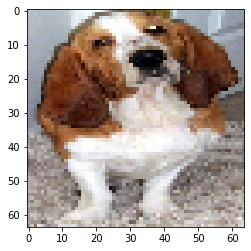

In [6]:
plt.imshow(Images[1])

In [7]:
Labels[1,0]

0

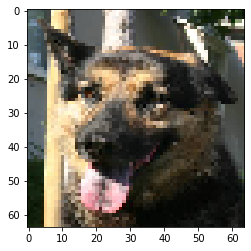

In [8]:
plt.imshow(Images[13526])

In [9]:
Labels[13526,0]

0

In [10]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels,test_labels = train_test_split(Images, Labels, test_size=0.3, stratify = Labels, random_state=42)

In [11]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(17500, 64, 64, 3)
(7500, 64, 64, 3)
(17500, 1)
(7500, 1)


In [12]:
from joblib import dump, load
dump(train_images, 'prepared_data/train_images.joblib')
dump(test_images, 'prepared_data/test_images.joblib')
dump(train_labels, 'prepared_data/train_labels.joblib')
dump(test_labels, 'prepared_data/test_labels.joblib')

['prepared_data/test_labels.joblib']